In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
sys.path.append(str(Path("..").resolve()))
from ast import literal_eval
from sdm import visualize_skillcorner as vsc
from sdm import visualize_features as vf
from IPython.display import HTML
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import os

In [2]:
og_path = "/home/lz80/rdf/sp161/shared/asi_gk_pos/gk_pos_model/"
feats = f"{og_path}/feats"
test = f"{og_path}/test"
files = os.listdir(feats)

#successes = pd.read_parquet(f"{feats}/y_success.parquet")
#test_set = successes.sample(1000).index

#for file in files:
#    path = f"{feats}/{file}"
#    df = pd.read_parquet(path).loc[test_set]
#    df.to_parquet(f"{test}/{file}")

In [3]:
from functools import partial
from unxpass.datasets import PassesDataset 
from unxpass.components.withSpeeds import pass_selection_speeds
import mlflow
dataset_test = partial(PassesDataset, path=test)

model_pass_selection = pass_selection_speeds.SoccerMapComponent(
    model=mlflow.pytorch.load_model(
        'runs:/2c3e51cd40e745bdbe846007f5245843/model', map_location='cpu'
    )
)
surfaces = model_pass_selection.predict_surface(dataset_test)

[10/29/25 21:56:24] INFO     Loading dataset from                                                   ]8;id=884277;file:///home/lz80/.venv/lib/python3.10/site-packages/lightning_utilities/core/rank_zero.py\rank_zero.py]8;;\:]8;id=970311;file:///home/lz80/.venv/lib/python3.10/site-packages/lightning_utilities/core/rank_zero.py#32\32]8;;\
                             /home/lz80/rdf/sp161/shared/asi_gk_pos/gk_pos_model/test                              

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


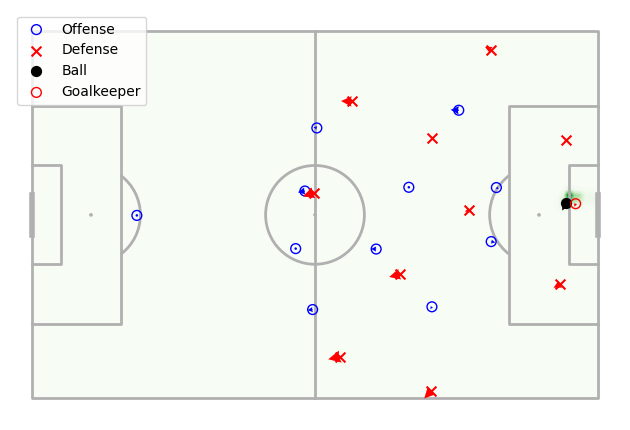

In [109]:
ball_ff = pd.read_parquet(f"{test}/x_ball_freeze_frame.parquet")
ff = pd.read_parquet(f"{test}/x_player_freeze_frame.parquet")
idx = ff.index[71]
surface = surfaces[idx[0]][idx[1]]
vf.plot_from_features(idx, ff, ball_ff, surface)
#idx

[10/29/25 22:24:24] INFO     Animation.save using <class 'matplotlib.animation.HTMLWriter'>       ]8;id=89891;file:///home/lz80/.venv/lib/python3.10/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=281225;file:///home/lz80/.venv/lib/python3.10/site-packages/matplotlib/animation.py#1052\1052]8;;\

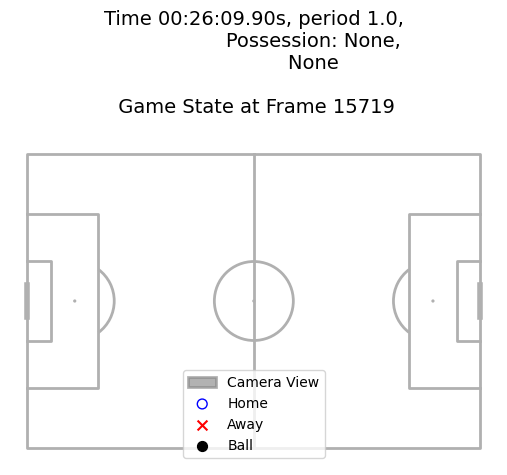

In [111]:
game, frame = idx
tracking = f"/home/lz80/rdf/sp161/shared/asi_gk_pos/data/tracking/{int(game)}_tracking.csv"
tracking = pd.read_csv(tracking)
event = pd.read_csv(f"/home/lz80/rdf/sp161/shared/asi_gk_pos/data/event/{int(game)}_events.csv")
metadata = pd.read_csv("/home/lz80/rdf/sp161/shared/asi_gk_pos/data/matches_meta.csv")
home_players = vsc.get_players(game, metadata)
anim = vsc.animate_gamestate(tracking, range(frame - 50, frame + 50), home_players)
HTML(anim.to_jshtml())

In [104]:
event[(event['frame_start'] > frame)]['start_type']# 15812
wyscout = pd.read_parquet("/home/lz80/rdf/sp161/shared/asi_gk_pos/data/wyscout_events_2026.parquet")

In [119]:
tracking[tracking['player_data'] == '[]']

frame    timestamp  period  \
0          0          NaN     NaN   
1          1          NaN     NaN   
2          2          NaN     NaN   
3          3          NaN     NaN   
4          4          NaN     NaN   
...      ...          ...     ...   
61907  61907  01:36:49.70     2.0   
61908  61908  01:36:49.80     2.0   
61909  61909  01:36:49.90     2.0   
61910  61910  01:36:50.00     2.0   
61911  61911          NaN     NaN   

                                               ball_data  \
0      {'x': None, 'y': None, 'z': None, 'is_detected...   
1      {'x': None, 'y': None, 'z': None, 'is_detected...   
2      {'x': None, 'y': None, 'z': None, 'is_detected...   
3      {'x': None, 'y': None, 'z': None, 'is_detected...   
4      {'x': None, 'y': None, 'z': None, 'is_detected...   
...                                                  ...   
61907  {'x': None, 'y': None, 'z': None, 'is_detected...   
61908  {'x': None, 'y': None, 'z': None, 'is_detected...   
61909  {'x': None, 'y': None, 'z': None, 'is_detected...   
61910  {'x': None, 'y': None, 'z': None, 'is_detected...   
61911  {'x': None, 'y': None, 'z': None, 'is_detected...   

                               possession  \
0      {'player_id': None, 'group': None}   
1      {'player_id': None, 'group': None}   
2      {'player_id': None, 'group': None}   
3      {'player_id': None, 'group': None}   
4      {'player_id': None, 'group': None}   
...                                   ...   
61907  {'player_id': None, 'group': None}   
61908  {'player_id': None, 'group': None}   
61909  {'player_id': None, 'group': None}   
61910  {'player_id': None, 'group': None}   
61911  {'player_id': None, 'group': None}   

                                image_corners_projection player_data  
0      {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
1      {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
2      {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
3      {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
4      {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
...                                                  ...         ...  
61907  {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
61908  {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
61909  {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
61910  {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  
61911  {'x_top_left': None, 'y_top_left': None, 'x_bo...          []  

[15533 rows x 7 columns]